In [11]:
from encoder import *
from decoder import *
from dataset import *
import gin

In [12]:
gin.parse_config_file("config/encoder_config1.gin")
encoder_config = EncoderConfig()

gin.parse_config_file("config/decoder_config1.gin")
decoder_config = DecoderConfig()

In [13]:
encoder = Encoder(encoder_config)
decoder = Decoder(decoder_config)

In [1]:
# # initialize the parameters of the encoder
# def initialize_encoder_parameters(module):
#     if isinstance(module, nn.Linear):
#         nn.init.xavier_uniform_(module.weight)
#         if module.bias is not None:
#             nn.init.zeros_(module.bias)
#     elif isinstance(module, nn.Embedding):
#         nn.init.normal_(module.weight, mean=0.0, std=0.02)
#     elif isinstance(module, nn.LayerNorm):
#         nn.init.constant_(module.weight, 1.0)
#         nn.init.constant_(module.bias, 0.0)

# encoder.apply(initialize_encoder_parameters)

In [15]:
# img, class_name = next(iter(train_dataloader))
# img.shape, class_name

# sample input 
img = torch.randn(1, 3, 128, 128)

In [16]:
encoder_op, mask, ids_restore = encoder(img)
decoder_op = decoder((encoder_op, mask, ids_restore), img)

In [17]:
decoder_op[0].shape, decoder_op[1]

(torch.Size([1, 3, 128, 128]), tensor(1.3427, grad_fn=<MseLossBackward0>))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4294617..2.4812615].


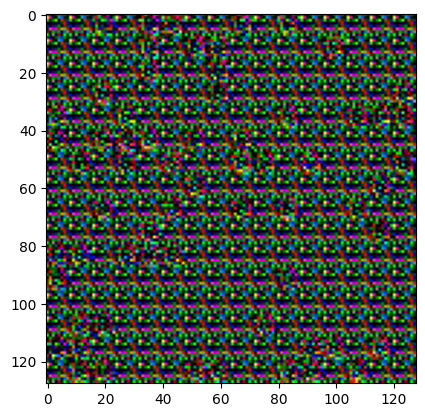

In [18]:
import matplotlib.pyplot as plt
plt.imshow(decoder_op[0].squeeze(0).detach().cpu().permute(1, 2, 0));